# Aplicando os conceitos de estatística

-----------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_excel("dataset.xlsx")
df

,Modelo,Ano,Cilindradas,Cavalos,Consumo_Litro_Km,Peso_kg,Km_Rodados,ValorTabela
0,Gol,2015,1000,110,12,1300,13150,25000
1,Gol,2016,1000,110,12,1300,13000,35000
2,Gol,2017,1000,110,12,1300,12850,45000
3,Gol,2018,1000,110,12,1300,12700,55000
4,Gol,2019,1000,110,12,1300,12550,75000
...,...,...,...,...,...,...,...,...
96,BMW X1,2016,2400,210,4,2400,100,35000
97,BMW X1,2017,2400,210,4,2400,100,45000
98,BMW X1,2018,2400,210,4,2400,100,55000
99,BMW X1,2019,2400,210,4,2400,100,75000


In [3]:
# Quantos e quais tipos de carro
df["Modelo"].value_counts()

# Todos os modelos possuem 6 entradas menos o IX35 que possui 5

Modelo
Gol         6
Palio       6
Uno         6
Civic       6
Corolla     6
Parati      6
Renegade    6
Voyage      6
Jetta       6
Creta       6
Onix        6
S10         6
Tracker     6
Vectra      6
Golf        6
BMW X1      6
IX35        5
Name: count, dtype: int64

In [4]:
# Quais os anos de cada tipo de carro
df["Ano"].value_counts()

# Os anos vão de 2015 a 2020

Ano
2015    17
2016    17
2017    17
2018    17
2019    17
2020    16
Name: count, dtype: int64

In [5]:
df[df["Modelo"] == "IX35"]

,Modelo,Ano,Cilindradas,Cavalos,Consumo_Litro_Km,Peso_kg,Km_Rodados,ValorTabela
48,IX35,2015,1800,210,8,2200,5950,25000
49,IX35,2016,1800,210,8,2200,5800,35000
50,IX35,2017,1800,210,8,2200,5650,45000
51,IX35,2018,1800,210,8,2200,5500,55000
52,IX35,2019,1800,210,8,2200,5350,75000


É possível ver que está faltando os dados do modelo IX35 no ano de 2020, vamos preencher com os devidos dados.

In [6]:
# inserindo a nova linha com as informações da IX35 na linha 53

parte1 = df.iloc[:53]
parte2 = df.iloc[53:]
nova_linha = {"Modelo": "IX35", "Ano": 2020, "Cilindradas": 1800, "Cavalos": 210, "Consumo_Litro_Km": 8,
              "Peso_kg": 2200, "Km_Rodados": 5750, "ValorTabela": 98000}

df = pd.concat([parte1, pd.DataFrame([nova_linha]), parte2], ignore_index=True)

In [7]:
df[df["Modelo"] == "IX35"]

,Modelo,Ano,Cilindradas,Cavalos,Consumo_Litro_Km,Peso_kg,Km_Rodados,ValorTabela
48,IX35,2015,1800,210,8,2200,5950,25000
49,IX35,2016,1800,210,8,2200,5800,35000
50,IX35,2017,1800,210,8,2200,5650,45000
51,IX35,2018,1800,210,8,2200,5500,55000
52,IX35,2019,1800,210,8,2200,5350,75000
53,IX35,2020,1800,210,8,2200,5750,98000


<Axes: >

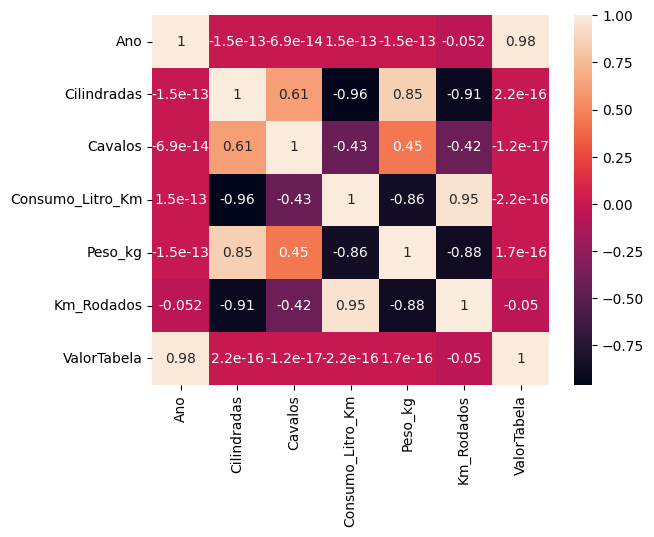

In [8]:
# Quais especificações possuem correlação entre si e quanto de correlação

sem_modelo = df.drop("Modelo", axis=1)
sns.heatmap(sem_modelo.corr(), annot=True)

In [9]:
# Funções para cálculos estatísticos
def mediana(xs: list) -> int:
    """Essa função recebe uma lista de números
    e retorna a mediana dos valores"""
    r = len(xs)
    a = sorted(xs)
    f = len(xs) // 2
    if r%2 == 0:
        return (a[f-1] + a[f]) / 2
    else:
        return a[r//2]
    
from typing import List
def quantil(xs: List[float], p: float) -> float:
    """Retorna um determinado valor referente a um
    quantil especificado de uma lista"""
    posicao_do_elemento = int(len(xs) * p)
    xs.sort()
    return xs[posicao_do_elemento]

import math
def desvio_padrao(lista: list) -> float:
    """Calcula o desvio padrão"""
    media = sum(lista) / len(lista)
    a = [i - media for i in lista]
    b = sum([i**2 for i in a]) / len(lista)
    return math.sqrt(b)

In [ ]:
# Cilindradas

cilindradas = df.groupby('Modelo')["Cilindradas"].max()
t = zip(cilindradas.index, cilindradas)
for i in t:
    print(f"{i[0]} | cilindradas: {i[1]}")

# Tendências centrais cilindradas (Média, Moda, Mediana, Quantils)
print("\nTendências centrais:")
media = sum(cilindradas) / len(cilindradas)
print(f"A média é {media}")
moda = Counter(cilindradas)
moda= list(zip(moda.keys(), moda.values()))
moda = sorted(moda, key=lambda x: x[1], reverse=True)
print(f"A moda é {moda[0][0]} cilindradas com {moda[0][1]} ocorrências")
print(f"A mediana é {mediana(cilindradas)}")
print(f"O primeiro quantil é {quantil(list(cilindradas), 0.25)} \
e o terceiro quantil é {quantil(list(cilindradas), 0.75)}")

# Tendências de dispersão (Desvio padrão, Range e Interquartil)
print("\nTendências de dispersão:")
print(f"O desvio padrão é {desvio_padrao(cilindradas)}")
print(f"O maior é {cilindradas.max()} e o menor é {cilindradas.min()}, com range de \
{cilindradas.max()-cilindradas.min()}")
print(f"O range interquartil (Q1 e Q3) é {quantil(list(cilindradas), 0.75) - quantil(list(cilindradas), 0.25)}")

BMW X1 | cilindradas: 2400
Civic | cilindradas: 1600
Corolla | cilindradas: 1600
Creta | cilindradas: 2000
Gol | cilindradas: 1000
Golf | cilindradas: 2000
IX35 | cilindradas: 1800
Jetta | cilindradas: 1800
Onix | cilindradas: 1800
Palio | cilindradas: 1000
Parati | cilindradas: 1600
Renegade | cilindradas: 1600
S10 | cilindradas: 1800
Tracker | cilindradas: 1800
Uno | cilindradas: 1000
Vectra | cilindradas: 2000
Voyage | cilindradas: 1600

Tendências centrais:
A média é 1670.5882352941176
A moda é 1600 cilindradas com 5 ocorrências
A mediana é 1800
O primeiro quantil é 1600 e o segundo quantil é 1800

Tendências de dispersão:
O desvio padrão é 369.04440332607345
O maior é 2400 e o menor é 1000, com range de 1400
O range interquartil (Q1 e Q3) é 200


In [ ]:
# Cavalos

cavalos = df.groupby('Modelo')["Cavalos"].max()
t = zip(cavalos.index, cavalos)
for i in t:
    print(f"{i[0]} | cavalos: {i[1]}")

# Tendências centrais cavalos (Média, Moda, Mediana, Quantils)
print("\nTendências centrais:")
media = sum(cavalos) / len(cavalos)
print(f"A média é {media}")
moda = Counter(cavalos)
moda= list(zip(moda.keys(), moda.values()))
moda = sorted(moda, key=lambda x: x[1], reverse=True)
print(f"A moda é {moda[0][0]} cavalos com {moda[0][1]} ocorrências")
print(f"A mediana é {mediana(cavalos)}")
print(f"O primeiro quantil é {quantil(list(cavalos), 0.25)} \
e o terceiro quantil é {quantil(list(cavalos), 0.75)}")

# Tendências de dispersão (Desvio padrão, Range e Interquartil)
print("\nTendências de dispersão:")
print(f"O desvio padrão é {desvio_padrao(cavalos)}")
print(f"O maior é {cavalos.max()} e o menor é {cavalos.min()}, com range de \
{cavalos.max()-cavalos.min()}")
print(f"O range interquartil (Q1 e Q3) é {quantil(list(cavalos), 0.75) - quantil(list(cavalos), 0.25)}")

BMW X1 | cavalos: 210
Civic | cavalos: 180
Corolla | cavalos: 180
Creta | cavalos: 140
Gol | cavalos: 110
Golf | cavalos: 140
IX35 | cavalos: 210
Jetta | cavalos: 210
Onix | cavalos: 210
Palio | cavalos: 110
Parati | cavalos: 180
Renegade | cavalos: 180
S10 | cavalos: 210
Tracker | cavalos: 210
Uno | cavalos: 110
Vectra | cavalos: 140
Voyage | cavalos: 180

Tendências centrais:
A média é 171.1764705882353
A moda é 210 cavalos com 6 ocorrências
A mediana é 180
O primeiro quantil é 140 e o segundo quantil é 210

Tendências de dispersão:
O desvio padrão é 37.24045127375156
O maior é 210 e o menor é 110, com range de 100
O range interquartil (Q1 e Q3) é 70


In [71]:
# Consumo

consumo = df.groupby('Modelo')["Consumo_Litro_Km"].max()
t = zip(consumo.index, consumo)
for i in t:
    print(f"{i[0]} | consumo: {i[1]} litro/km")

# Tendências centrais consumo (Média, Moda, Mediana, Quantils)
print("\nTendências centrais:")
media = sum(consumo) / len(consumo)
print(f"A média é {media}")
moda = Counter(consumo)
moda= list(zip(moda.keys(), moda.values()))
moda = sorted(moda, key=lambda x: x[1], reverse=True)
print(f"A moda é {moda[0][0]} consumo com {moda[0][1]} ocorrências")
print(f"A mediana é {mediana(consumo)}")
print(f"O primeiro quantil é {quantil(list(consumo), 0.25)} \
e o terceiro quantil é {quantil(list(consumo), 0.75)}")

# Tendências de dispersão (Desvio padrão, Range e Interquartil)
print("\nTendências de dispersão:")
print(f"O desvio padrão é {desvio_padrao(consumo)}")
print(f"O maior é {consumo.max()} e o menor é {consumo.min()}, com range de \
{consumo.max()-consumo.min()}")
print(f"O range interquartil (Q1 e Q3) é {quantil(list(consumo), 0.75) - quantil(list(consumo), 0.25)}")

BMW X1 | consumo: 4 litro/km
Civic | consumo: 10 litro/km
Corolla | consumo: 10 litro/km
Creta | consumo: 6 litro/km
Gol | consumo: 12 litro/km
Golf | consumo: 6 litro/km
IX35 | consumo: 8 litro/km
Jetta | consumo: 8 litro/km
Onix | consumo: 8 litro/km
Palio | consumo: 12 litro/km
Parati | consumo: 10 litro/km
Renegade | consumo: 10 litro/km
S10 | consumo: 8 litro/km
Tracker | consumo: 8 litro/km
Uno | consumo: 12 litro/km
Vectra | consumo: 6 litro/km
Voyage | consumo: 10 litro/km

Tendências centrais:
A média é 8.705882352941176
A moda é 10 consumo com 5 ocorrências
A mediana é 8
O primeiro quantil é 8 e o terceiro quantil é 10

Tendências de dispersão:
O desvio padrão é 2.2690942967042247
O maior é 12 e o menor é 4, com range de 8
O range interquartil (Q1 e Q3) é 2


In [74]:
# Peso

peso = df.groupby('Modelo')["Peso_kg"].max()
t = zip(peso.index, peso)
for i in t:
    print(f"{i[0]} | peso: {i[1]} kg")

# Tendências centrais peso (Média, Moda, Mediana, Quantils)
print("\nTendências centrais:")
media = sum(peso) / len(peso)
print(f"A média é {media}")
moda = Counter(peso)
moda= list(zip(moda.keys(), moda.values()))
moda = sorted(moda, key=lambda x: x[1], reverse=True)
print(f"A moda é {moda[0][0]} peso com {moda[0][1]} ocorrências")
print(f"A mediana é {mediana(peso)}")
print(f"O primeiro quantil é {quantil(list(peso), 0.25)} \
e o terceiro quantil é {quantil(list(peso), 0.75)}")

# Tendências de dispersão (Desvio padrão, Range e Interquartil)
print("\nTendências de dispersão:")
print(f"O desvio padrão é {desvio_padrao(peso)}")
print(f"O maior é {peso.max()} e o menor é {peso.min()}, com range de \
{peso.max()-peso.min()}")
print(f"O range interquartil (Q1 e Q3) é {quantil(list(peso), 0.75) - quantil(list(peso), 0.25)}")

BMW X1 | peso: 2400 kg
Civic | peso: 1800 kg
Corolla | peso: 1800 kg
Creta | peso: 2400 kg
Gol | peso: 1300 kg
Golf | peso: 2400 kg
IX35 | peso: 2200 kg
Jetta | peso: 2200 kg
Onix | peso: 1500 kg
Palio | peso: 1400 kg
Parati | peso: 1800 kg
Renegade | peso: 1800 kg
S10 | peso: 2400 kg
Tracker | peso: 2400 kg
Uno | peso: 1400 kg
Vectra | peso: 2400 kg
Voyage | peso: 1800 kg

Tendências centrais:
A média é 1964.7058823529412
A moda é 2400 peso com 6 ocorrências
A mediana é 1800
O primeiro quantil é 1800 e o terceiro quantil é 2400

Tendências de dispersão:
O desvio padrão é 396.96077220712914
O maior é 2400 e o menor é 1300, com range de 1100
O range interquartil (Q1 e Q3) é 600


In [131]:
# Km rodados
km_media = df.groupby('Modelo')["Km_Rodados"].mean()
t = zip(km_media.index, km_media)
for i in t:
    print(f"{i[0]} | km media: {i[1]}km")

# Tendências centrais km_media (Média, Moda, Mediana, Quantils)
print("\nTendências centrais:")
media = sum(km_media) / len(km_media)
print(f"A média é {media}")
moda = Counter(km_media)
moda= list(zip(moda.keys(), moda.values()))
moda = sorted(moda, key=lambda x: x[1], reverse=True)
print(f"A moda é {moda[0][0]} km_media com {moda[0][1]} ocorrências")
print(f"A mediana é {mediana(km_media)}")
print(f"O primeiro quantil é {quantil(list(km_media), 0.25)} \
e o terceiro quantil é {quantil(list(km_media), 0.75)}")

# Tendências de dispersão (Desvio padrão, Range e Interquartil)
print("\nTendências de dispersão:")
print(f"O desvio padrão é {desvio_padrao(km_media)}")
print(f"O maior é {km_media.max()} e o menor é {km_media.min()}, com range de \
{km_media.max()-km_media.min()}")
print(f"O range interquartil (Q1 e Q3) é {quantil(list(km_media), 0.75) - quantil(list(km_media), 0.25)}")

BMW X1 | km media: 100.0km
Civic | km media: 10075.0km
Corolla | km media: 9175.0km
Creta | km media: 1225.0km
Gol | km media: 12775.0km
Golf | km media: 350.0km
IX35 | km media: 5666.666666666667km
Jetta | km media: 4825.0km
Onix | km media: 3925.0km
Palio | km media: 11875.0km
Parati | km media: 8275.0km
Renegade | km media: 7375.0km
S10 | km media: 3025.0km
Tracker | km media: 2125.0km
Uno | km media: 10975.0km
Vectra | km media: 100.0km
Voyage | km media: 6475.0km

Tendências centrais:
A média é 5784.803921568628
A moda é 100.0 km_media com 2 ocorrências
A mediana é 5666.666666666667
O primeiro quantil é 2125.0 e o terceiro quantil é 9175.0

Tendências de dispersão:
O desvio padrão é 4147.036341662511
O maior é 12775.0 e o menor é 100.0, com range de 12675.0
O range interquartil (Q1 e Q3) é 7050.0


In [11]:
# Qual a porcentagem de aumento médio por ano do valor de cada tipo de carro
# Todos os carros possuem os mesmos valores e aumentos por ano
valores = list(df[df["Modelo"] == "IX35"]["ValorTabela"])
porcent = []
for i in range(len(valores) -1):
    porcent.append(round((valores[i+1] - valores[i]) / valores[i], 2) * 100)

media = sum(porcent) / len(porcent)

print(f"A média do aumento do valor do carro a cada ano é de {media}%")

A média do aumento do valor do carro a cada ano é de 31.6%
